In [1]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

        
def decision_Perceptron(X,y,classifier): 

    # Convert y to a 1D array using ravel()
    y = y.to_numpy().ravel()


    print('Class labels:', np.unique(y))
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)
#Y = y.astype(np.int32)
#print('Labels counts in y:', np.bincount(Y[:,0]))
#YTR = y_train.astype(np.int32)
#print('Labels counts in y_train:', np.bincount(YTR[:,0]))
#XTS = y_test.astype(np.int32)
#print('Labels counts in y_test:', np.bincount(XTS[:,0]))
    from sklearn.preprocessing import StandardScaler

#    sc = StandardScaler()
    sc = MinMaxScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    if classifier == 'ppn':
        from sklearn.linear_model import Perceptron

        ppn = Perceptron(eta0=0.1, random_state=1)
        ppn.fit(X_train_std, y_train)

        y_pred = ppn.predict(X_test_std)
        print('Misclassified examples: %d' % (y_test != y_pred).sum())

        from sklearn.metrics import accuracy_score

        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

        print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))
        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))
        return X_combined_std,y_combined,ppn

    if classifier == 'knn':        
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
        knn.fit(X_train_std, y_train)        
        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))
        return X_combined_std,y_combined,knn

'text/html'

'<style>.container { width:550% !important; }</style>'

In [2]:
df = pd.DataFrame()
df = pd.read_csv('03.WildRunner.joined_versenyadatok.csv',sep=';', encoding='utf-8')

In [3]:
#colour_mapping = {'P': 0,'K': 1}
print(sorted(df['colour'].unique()))
colour_mapping = {label: idx for idx, label in enumerate(np.unique(df['colour']))}
df['colour'] = df['colour'].map(colour_mapping)
colour_mapping
#df
#WLT_mapping = {'W': 0,'L': 1,'T': 2}
print(sorted(df['WLT'].unique()))
WLT_mapping = {label: idx for idx, label in enumerate(np.unique(df['WLT']))}
df['WLT'] = df['WLT'].map(WLT_mapping)
WLT_mapping
name_mapping = {label: idx for idx, label in enumerate(np.unique(df['name']))}
df['name'] = df['name'].map(name_mapping)
name_mapping
#who mapping
print(sorted(df['who'].unique()))
who_mapping = {label: idx for idx, label in enumerate(np.unique(df['who']))}
df['who'] = df['who'].map(who_mapping)
who_mapping


[0, 1]
[0, 1, 2]
[0, 1, 2, 3, 4, 5, 6]


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [4]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
#    count number of rows with missing values
#    n_miss = df[[i]].isnull().sum()
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 

In [6]:
print("Column names:", df.columns.tolist())
df.head()
#print("Column names:", df.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)

Column names: ['when', 'place', 'division', 'who', 'felvezeto', 'nev', 'fajta', 'nem', 'ivar', 'szuletesi_datum', 'chip_szam', 'ulna_hossz', 'ugrasi_magassag', 'ivarlabel', 'chip_szamlabel', 'name', 'running', 'WLT', 'dtime', 'run', 'withwho', 'total', 'hurdless', 'colour', 'dog', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel', 'time', 'temp_c', 'wind_kph', 'wind_degree', 'wind_dir', 'will_it_rain', 'chance_of_rain', 'humidity', 'datum', 'datumlabel', 'wind_dirlabel', 'placelabel', 'L_count', 'T_count', 'W_count', 'W_max', 'dogcl', 'wind_kphcl', 'temp_ccl', 'humcl', 'whenlabel']
Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: '

__A kutyák egyéni futási ideje(dog) független a pálya színétől__

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel']
Class labels: [0 1]
Misclassified examples: 662
Accuracy: 0.504
Accuracy: 0.504


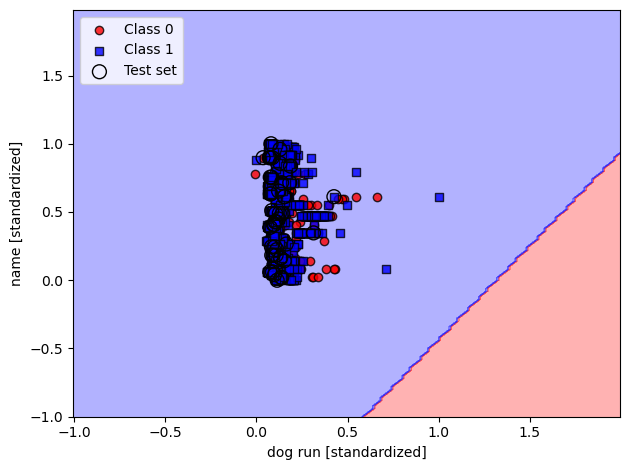

In [88]:
print("Column names:", df.columns.tolist())
df.head()

X = df.iloc[:, [24, 15]]  # dog, name
y = df.iloc[:, [23]] # colour

X_combined_std, y_combined, ppn = decision_Perceptron(X,y,'ppn')

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('dog run [standardized]')
plt.ylabel('name [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

__A kutyák egyéni start(start) ideje független a pálya színétől__   
__gyenge kapcsolat lehetséges, a piros pályán indulók start idői rosszabbak__  

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel']
Class labels: [0 1]
Misclassified examples: 670
Accuracy: 0.498
Accuracy: 0.498


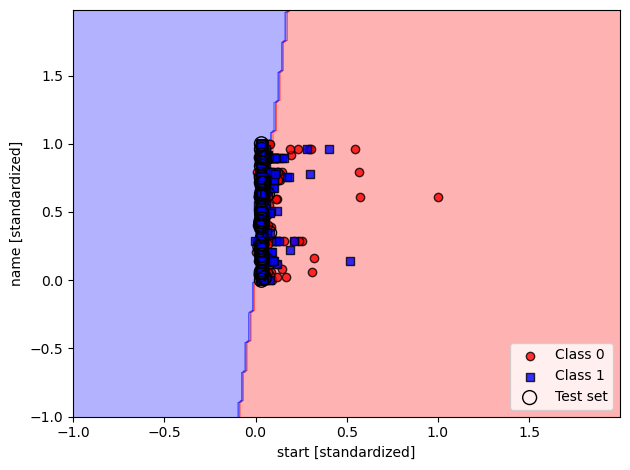

In [89]:
print("Column names:", df.columns.tolist())
df.head()

X = df.iloc[:, [25,15]]  #  start,name
y = df.iloc[:, [23]] # colour

X_combined_std, y_combined, ppn = decision_Perceptron(X,y,'ppn') 

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('start [standardized]')
plt.ylabel('name [standardized]')
#plt.legend(loc='upper left')
plt.legend(loc='lower right')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel']
Class labels: [0 1]


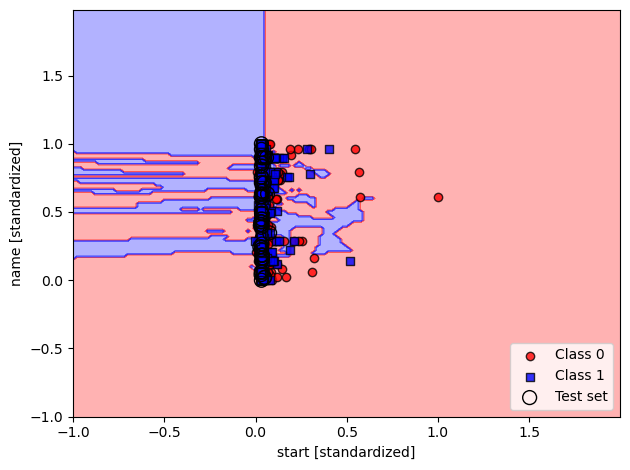

In [90]:
print("Column names:", df.columns.tolist())
df.head()

X = df.iloc[:, [23,15]]  #  start,name
y = df.iloc[:, [23]] # colour

X_combined_std, y_combined, knn = decision_Perceptron(X,y,'knn') 

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('start [standardized]')
plt.ylabel('name [standardized]')
#plt.legend(loc='upper left')
plt.legend(loc='lower right')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

__A csapatok futási ideje(total) független a pálya színétől__

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel']
Class labels: [0 1]
Misclassified examples: 662
Accuracy: 0.504
Accuracy: 0.504


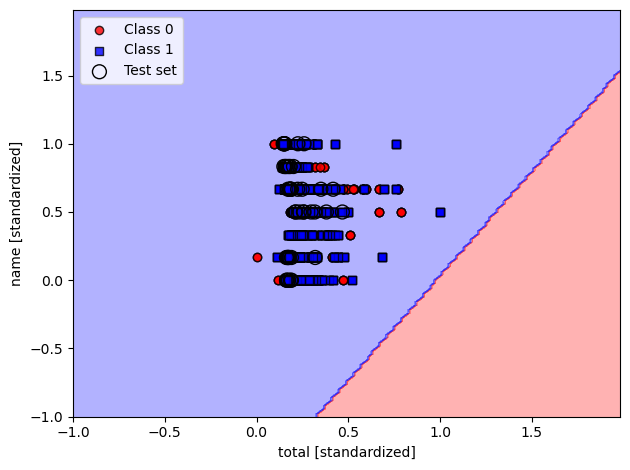

In [91]:
print("Column names:", df.columns.tolist())
df.head()

X = df.iloc[:, [21,3]]  #  total,who
y = df.iloc[:, [23]] # colour

X_combined_std, y_combined, ppn = decision_Perceptron(X,y,'ppn')

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('total [standardized]')
plt.ylabel('name [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

__A csapatok győzelmi esélye(WLT) független a pálya színétől__

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel']
Class labels: [0 1]
Misclassified examples: 660
Accuracy: 0.506
Accuracy: 0.506


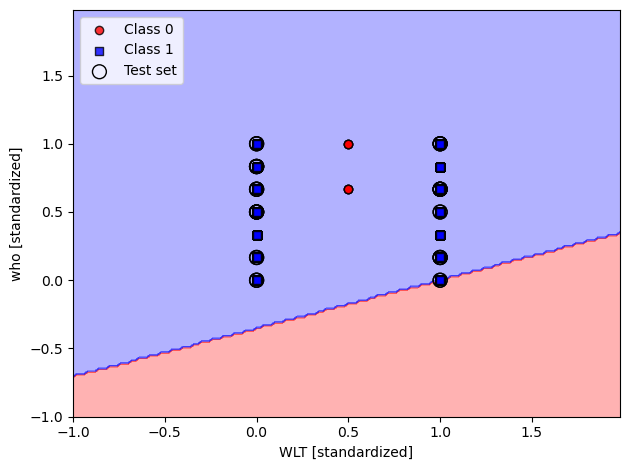

In [92]:
print("Column names:", df.columns.tolist())
df.head()

X = df.iloc[:, [17, 3]]  #  WLT,who
y = df.iloc[:, [23]] # colour

X_combined_std, y_combined, ppn = decision_Perceptron(X,y,'ppn')

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('WLT [standardized]')
plt.ylabel('who [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()